 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
Whale_returns = pd.read_csv("Resources\\whale_returns.csv",parse_dates=True,infer_datetime_format=True,index_col="Date")


In [4]:
# Count nulls
Whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
Whale_returns.dropna(inplace=True)

In [6]:
# double check
Whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
Algo_returns = pd.read_csv("Resources\\algo_returns.csv",parse_dates=True,infer_datetime_format=True,index_col="Date")


In [9]:
# Count nulls
Algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
Algo_returns.dropna(inplace=True)

In [11]:
#double check
Algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history=pd.read_csv("Resources\\sp500_history.csv",parse_dates=True,infer_datetime_format=True,index_col="Date")


In [13]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_df = sp500_history["Close"].str.replace("$","")



C:\Users\eszczepalink\AppData\Local\Temp\ipykernel_5736\1700703013.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df = sp500_history["Close"].str.replace("$","")


In [15]:
sp500_history = sp500_df.astype("float")

In [16]:
# Calculate Daily Returns
sp500_history.pct_change()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64

In [17]:
# Count nulls
sp500_history.pct_change().isnull().sum()

1

In [18]:
# Drop nulls
sp500_history_returns = sp500_history.pct_change().dropna()

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_returns = sp500_history_returns.rename("SP500")[::-1]
sp500_history_returns

Date
2012-10-01   -0.000872
2012-10-02   -0.003611
2012-10-03   -0.007123
2012-10-04    0.000322
2012-10-05    0.003469
                ...   
2019-04-15   -0.000509
2019-04-16    0.002279
2019-04-17   -0.001577
2019-04-18   -0.001011
2019-04-22   -0.008764
Name: SP500, Length: 1648, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's 
#returns.
Whale_Algo_sp500_returns = pd.concat([Whale_returns,Algo_returns,sp500_history_returns],axis=1, join="inner")
Whale_Algo_sp500_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns of all portfolios and sp500'}, xlabel='Date'>

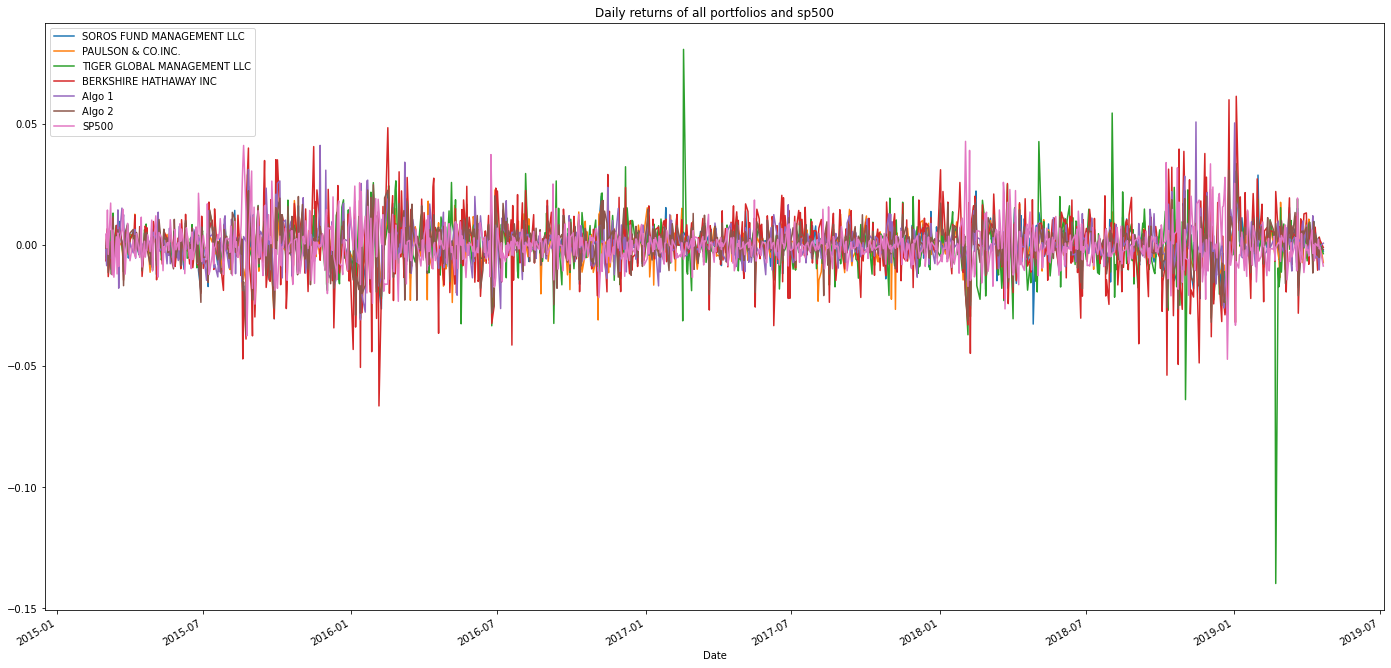

In [28]:
# Plot daily returns of all portfolios
Whale_Algo_sp500_returns.plot(figsize=(24,12),title="Daily returns of all portfolios and sp500")
    

In [ ]:
'''
Too much noise that data need to be cleaned more, but the are two risky picks up and down for TIGER GLOBAl in mid 2017
and mid 2019.
'''

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios and the S&P 500'}, xlabel='Date'>

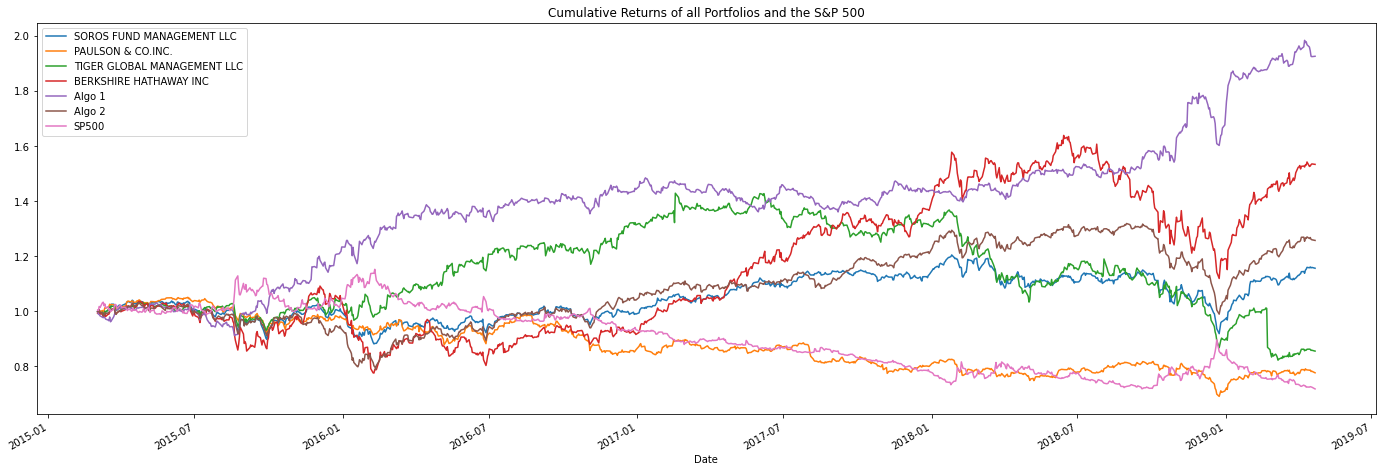

In [29]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1+Whale_Algo_sp500_returns).cumprod() 

# Plot cumulative returns
cummulative_returns.plot(figsize = (24,8), title = "Cumulative Returns of all Portfolios and the S&P 500")

In [ ]:
'''
all the portfolios outperfermed sp500 throughout the period.
'''

In [42]:
cummulative_returns.sum()

SOROS FUND MANAGEMENT LLC      1093.807687
PAULSON & CO.INC.               912.929278
TIGER GLOBAL MANAGEMENT LLC    1196.467681
BERKSHIRE HATHAWAY INC         1207.929121
Algo 1                         1446.776658
Algo 2                         1132.418692
SP500                           938.398146
dtype: float64

In [43]:
(cummulative_returns -1).sum() 

SOROS FUND MANAGEMENT LLC       51.807687
PAULSON & CO.INC.             -129.070722
TIGER GLOBAL MANAGEMENT LLC    154.467681
BERKSHIRE HATHAWAY INC         165.929121
Algo 1                         404.776658
Algo 2                          90.418692
SP500                         -103.601854
dtype: float64

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily returns of all portfolios and sp500'}>

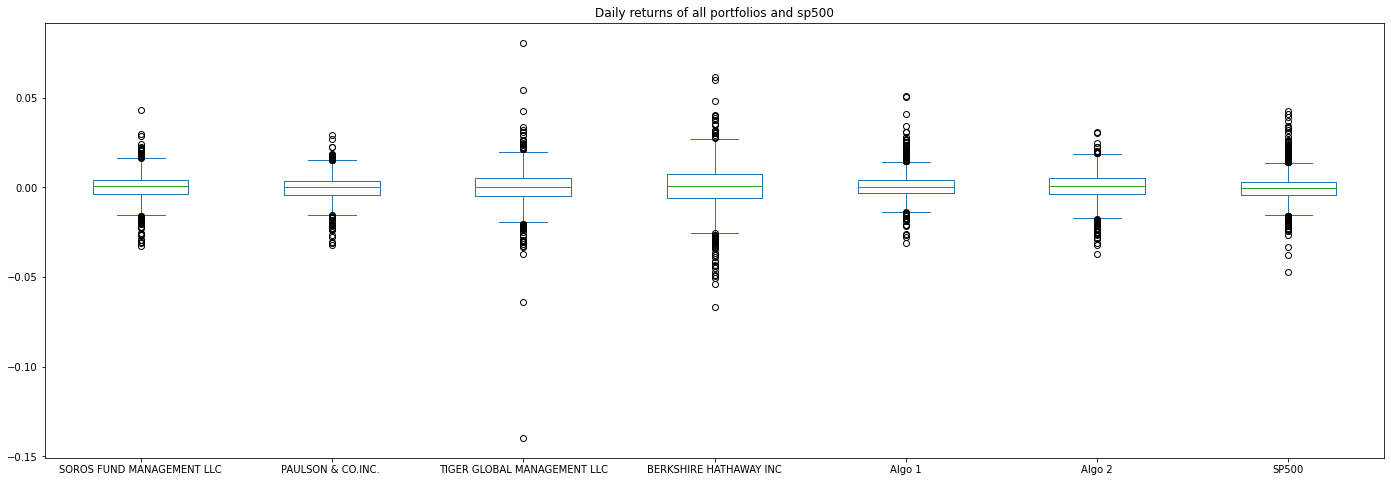

In [32]:
# Box plot to visually show risk
Whale_Algo_sp500_returns.plot.box(figsize=(24,8),title="Daily returns of all portfolios and sp500")

In [ ]:
'''
By eye balling we can tell that TIGER GLOBAL & BERSHIRE MANAGEMENT are more volatiles than sp500.
'''

### Calculate Standard Deviations

In [35]:
# Calculate the daily standard deviations of all portfolios
daily_standard_deviations = Whale_Algo_sp500_returns.std()
daily_standard_deviations

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [ ]:
'''
Also here by  calculation shows that TIGER GLOBAL & BERSHIRE MANAGEMENT having highter standard_deviations daily 
return than sp500.
'''

### Determine which portfolios are riskier than the S&P 500

In [50]:
# Calculate  the daily standard deviation of S&P 500
standard_deviation_of_Sp500 = Whale_Algo_sp500_returns["SP500"].std()
standard_deviation_of_Sp500
# Determine which portfolios are riskier than the S&P 500
#Whale_Algo_sp500_returns["SP500"]>[Whale_Algo_sp500_returns]
riskier_portfolios = [daily_standard_deviations>standard_deviation_of_Sp500]
riskier_portfolios

[SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 SP500                          False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized standard deviation (252 trading days)
annually_standard_deviations = Whale_Algo_sp500_returns.std()*np.sqrt(252)
annually_standard_deviations

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Window std of all fortfolios and sp500'}, xlabel='Date'>

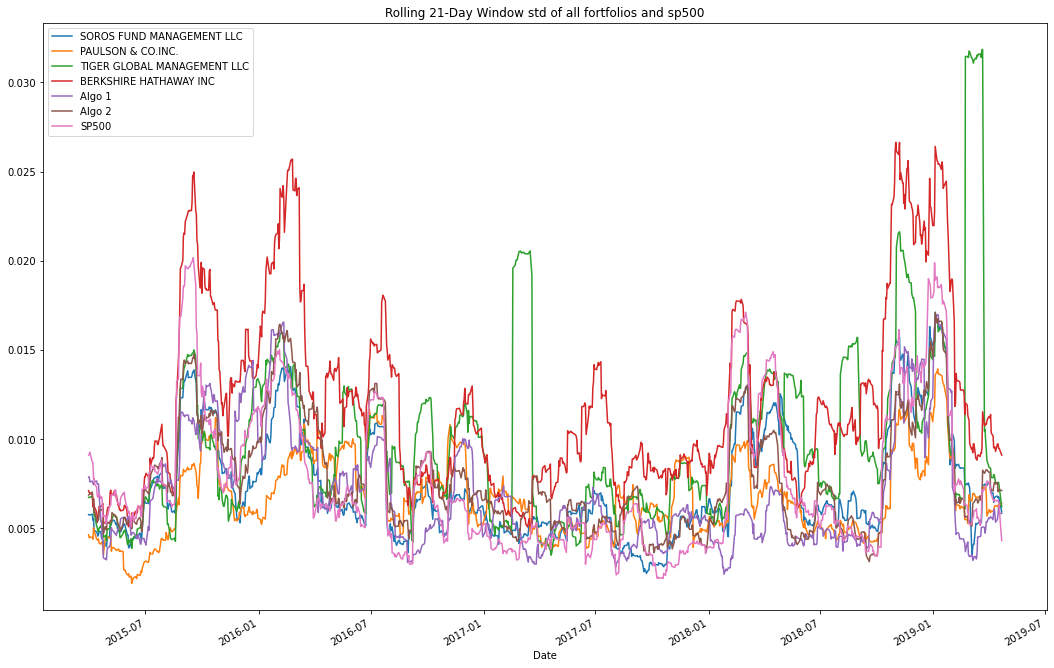

In [54]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation =Whale_Algo_sp500_returns.rolling(21).std().dropna()
# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(18,12),title="Rolling 21-Day Window std of all fortfolios and sp500")

In [ ]:
'''
For 21 rolling window the green & red portfolios are more volatile 
'''

### Calculate and plot the correlation

<AxesSubplot:>

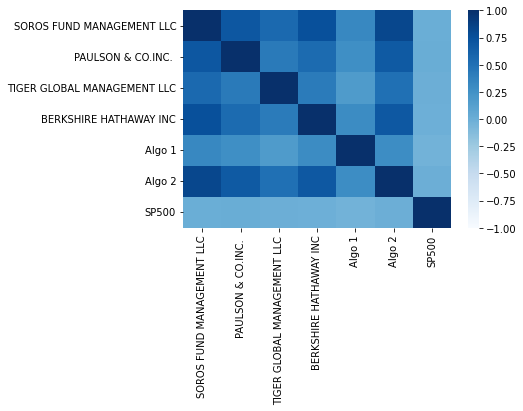

In [63]:
import seaborn as sns
# Calculate the correlation
correlation = Whale_Algo_sp500_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation,vmin=-1,vmax=1,cmap="Blues")

In [ ]:
'''
The darker it gets the more correclaions we have alawys between 1 and -1
'''

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta for a Algo 1 portfolio and the S&P 500'}, xlabel='Date'>

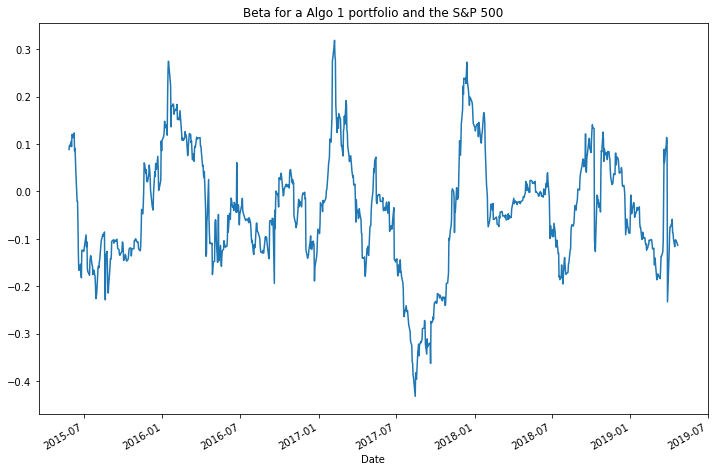

In [82]:
# Calculate covariance of a single portfolio
rolling_Algo_cov = Whale_Algo_sp500_returns["Algo 1"].rolling(60).cov(Whale_Algo_sp500_returns["SP500"]).dropna()
# Calculate variance of S&P 500
rolling_Var_sp500= Whale_Algo_sp500_returns["SP500"].rolling(60).var().dropna()
# Computing beta
beta = rolling_Algo_cov / rolling_Var_sp500

# Plot beta trend
beta.plot(figsize=(12,8),title="Beta for a Algo 1 portfolio and the S&P 500")

In [ ]:
'''
There are a lots of ups and downs to the makert in periods of 2016,2017,mid 2017, and 2018.

'''

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

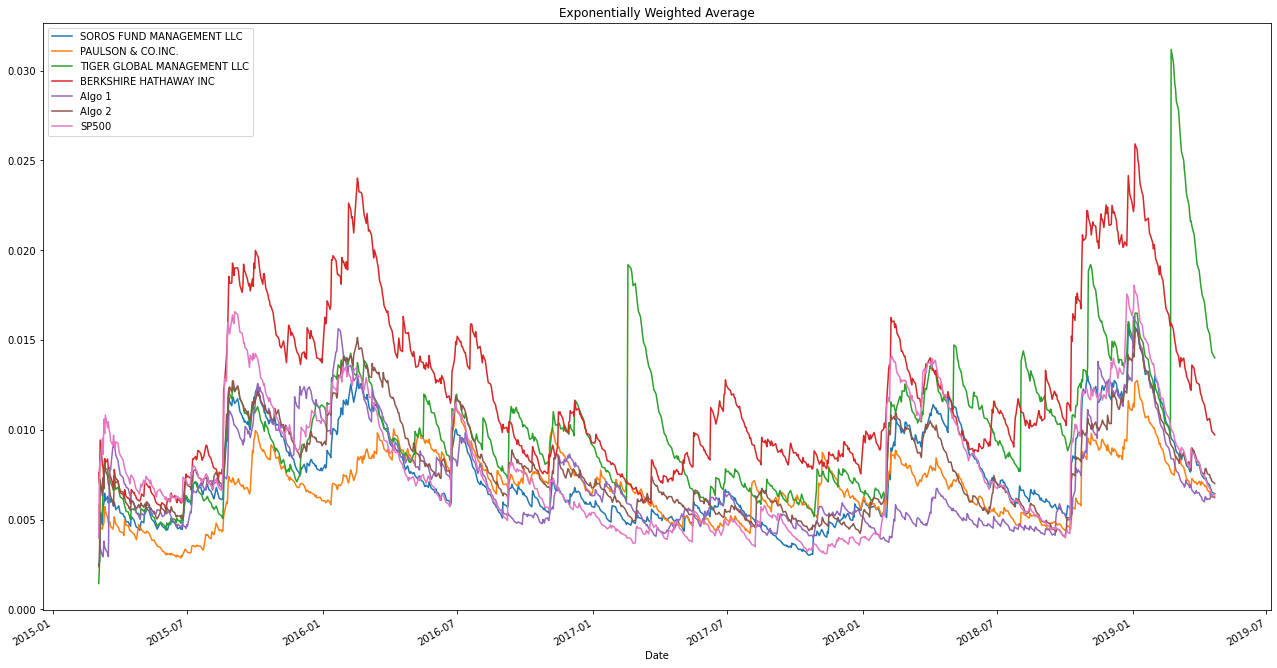

In [87]:
# Use `ewm` to calculate the rolling window
ewm = Whale_Algo_sp500_returns.ewm(21).std().dropna()
ewm.plot(figsize=(22,12), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [246]:
# Annualized Sharpe Ratios
Annual_sharpe_ratios = Whale_Algo_sp500_returns.mean()*(252)
Annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.042981
PAULSON & CO.INC.             -0.054807
TIGER GLOBAL MANAGEMENT LLC   -0.022521
BERKSHIRE HATHAWAY INC         0.124430
Algo 1                         0.165729
Algo 2                         0.064132
SP500                         -0.070689
dtype: float64

<AxesSubplot:>

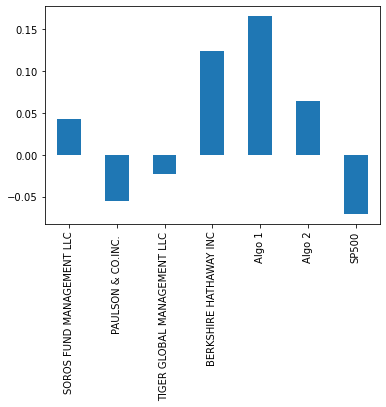

In [91]:
# Visualize the sharpe ratios as a bar plot
Annual_sharpe_ratios.plot.bar()

In [ ]:
'''
some of bars are above zero and the others are below 
sharpe rations basically is how much risk to take to get some returns on portfolio
'''

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [ ]:
'''
1.Algo 1 outperform all portfolios(show plot above) 

'''

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [139]:
# Reading data from 1st stock
aapl_historical = pd.read_csv("Resources\\aapl_historical.csv",parse_dates=True,infer_datetime_format=True,index_col="Trade DATE")
aapl_historical=aapl_historical.drop(["Symbol"],axis=1).rename(columns={"NOCP":"aapl"})
aapl_historical.dropna(inplace=True)
aapl_historical=aapl_historical[::-1]

In [138]:
# Reading data from 2nd stock
goog_historical = pd.read_csv("Resources\\goog_historical.csv",parse_dates=True,infer_datetime_format=True,index_col="Trade DATE")
goog_historical=goog_historical.drop(["Symbol"],axis=1).rename(columns={"NOCP":"goog"})
goog_historical.dropna(inplace=True)
goog_historical = goog_historical[::-1]

In [140]:
# Reading data from 3rd stock
cost_historical = pd.read_csv("Resources\\cost_historical.csv",parse_dates=True,infer_datetime_format=True,index_col="Trade DATE")
cost_historical=cost_historical.drop(["Symbol"],axis=1).rename(columns={"NOCP":"cost"})
cost_historical.dropna(inplace=True)
cost_historical=cost_historical[::-1]

In [146]:
# Combine all stocks in a single DataFrame
aap_goog_cost_returns = pd.concat([aapl_historical,goog_historical,cost_historical],axis=1, join="inner")


In [152]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol
aap_goog_cost_returns

,aapl,goog,cost
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [151]:
# Calculate daily returns
aap_goog_cost_returns.pct_change()
# Drop NAs
portfolio = aap_goog_cost_returns.pct_change().dropna()
# Display sample data
portfolio

,aapl,goog,cost
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


<AxesSubplot:title={'center':'portfolio returns'}, xlabel='Trade DATE'>

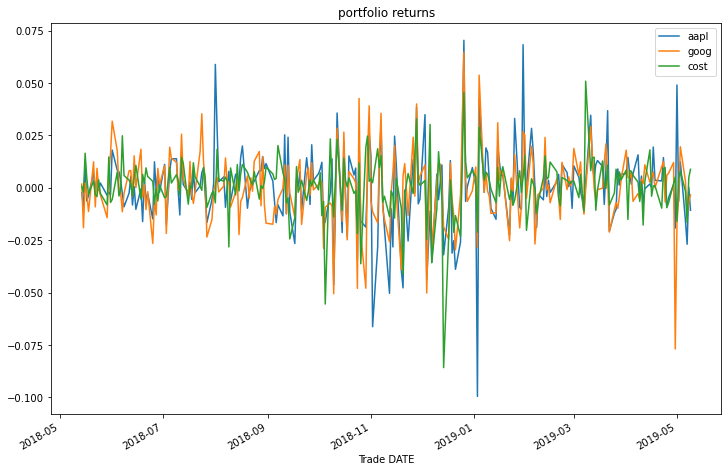

In [158]:
portfolio.plot(figsize=(12,8),title="portfolio returns")

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [156]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio =portfolio.dot(weights) 
# Display sample data
weighted_portfolio

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

<AxesSubplot:title={'center':'weighted protfolio returns'}, xlabel='Trade DATE'>

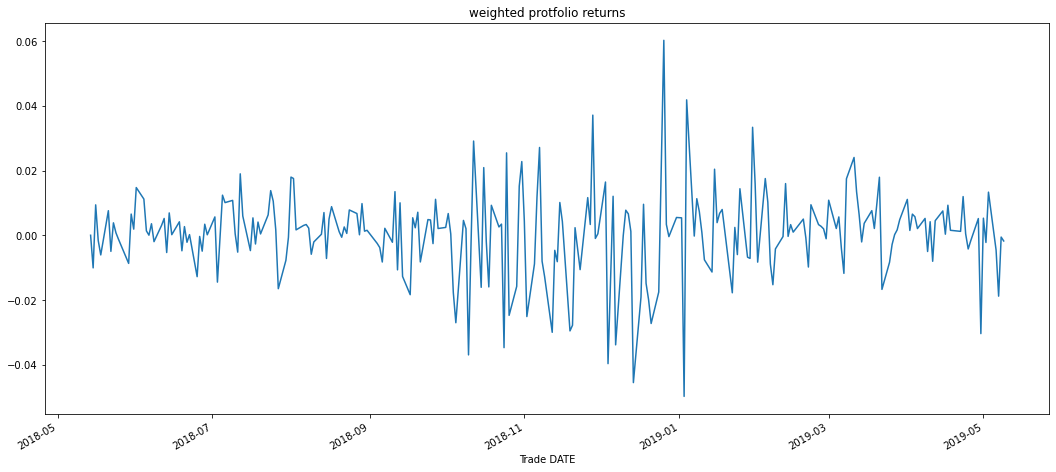

In [157]:
weighted_portfolio.plot(figsize=(18,8),title="weighted portfolio returns")

In [ ]:
'''
We can see som much zigzag in portfolio 
'''

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [160]:
# Join your returns DataFrame to the original returns DataFrame
portfolio["weighted_portfolio"] = weighted_portfolio
portfolio

,aapl,goog,cost,weighted_portfolio
Trade DATE,,,,
2018-05-14,-0.002333,0.001766,0.000613,0.000015
2018-05-15,-0.009088,-0.019060,-0.002042,-0.010064
2018-05-16,0.009333,0.002354,0.016523,0.009403
2018-05-17,-0.006324,-0.002940,0.004479,-0.001595
2018-05-18,-0.003637,-0.011339,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.019602,0.007953,0.013329
2019-05-06,-0.015443,0.003366,-0.001594,-0.004557
2019-05-07,-0.026957,-0.012855,-0.016583,-0.018798


In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio.isnull().sum().dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [168]:
# Calculate the annualized `std`
portfolio.std()*np.sqrt(252)

aapl                  0.296955
goog                  0.263554
cost                  0.209320
weighted_portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 day rolling std for fortfolio'}, xlabel='Trade DATE'>

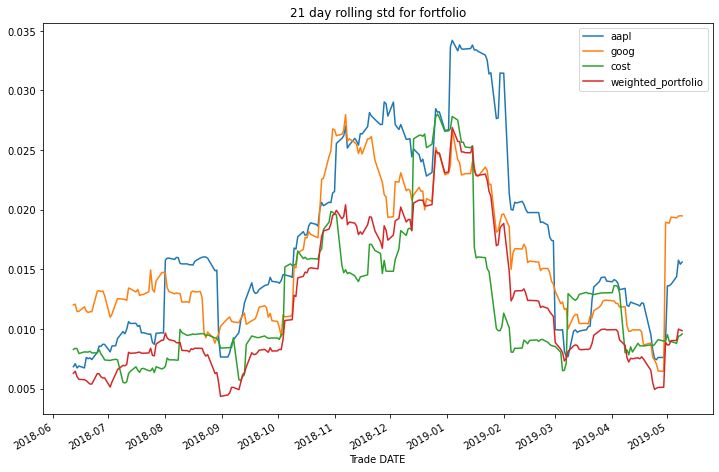

In [174]:
# Calculate rolling standard deviation
rolling_std_21 = portfolio.rolling(21).std().dropna()
# Plot rolling standard deviation
rolling_std_21.plot(figsize=(12,8),title="21 day rolling std for fortfolio")

### Calculate and plot the correlation

In [176]:
# Calculate and plot the correlation
portfolio.corr()

,aapl,goog,cost,weighted_portfolio
aapl,1.000000,0.655007,0.413546,0.881676
goog,0.655007,1.000000,0.385145,0.853984
cost,0.413546,0.385145,1.000000,0.687446
weighted_portfolio,0.881676,0.853984,0.687446,1.000000


<AxesSubplot:>

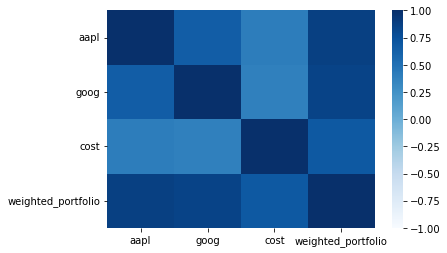

In [181]:
sns.heatmap(portfolio.corr(),vmin=-1,vmax=1,cmap="Blues")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [214]:
portfolio_sp500 = pd.concat([portfolio,Whale_Algo_sp500_returns["SP500"]],axis=1, join="inner")

In [223]:
portfolio_sp500.head()

,aapl,goog,cost,weighted_portfolio,SP500
2018-05-14,-0.002333,0.001766,0.000613,0.000015,0.006889
2018-05-15,-0.009088,-0.019060,-0.002042,-0.010064,-0.004044
2018-05-16,0.009333,0.002354,0.016523,0.009403,0.000857
2018-05-17,-0.006324,-0.002940,0.004479,-0.001595,0.002639
2018-05-18,-0.003637,-0.011339,-0.003206,-0.006061,-0.007333


In [238]:
cov_portfolio_sp500 = portfolio['aapl'].rolling(60).cov(portfolio_sp500["SP500"]).dropna()
cov_portfolio_sp500 = portfolio['goog'].rolling(60).cov(portfolio_sp500["SP500"]).dropna()
cov_portfolio_sp500 = portfolio['cost'].rolling(60).cov(portfolio_sp500["SP500"]).dropna()
cov_portfolio_sp500 = portfolio['weighted_portfolio'].rolling(60).cov(portfolio_sp500["SP500"]).dropna()


In [239]:
var_portfolio_sp500 = portfolio_sp500["SP500"].rolling(60).var().dropna()



<AxesSubplot:title={'center':'aapl beta'}>

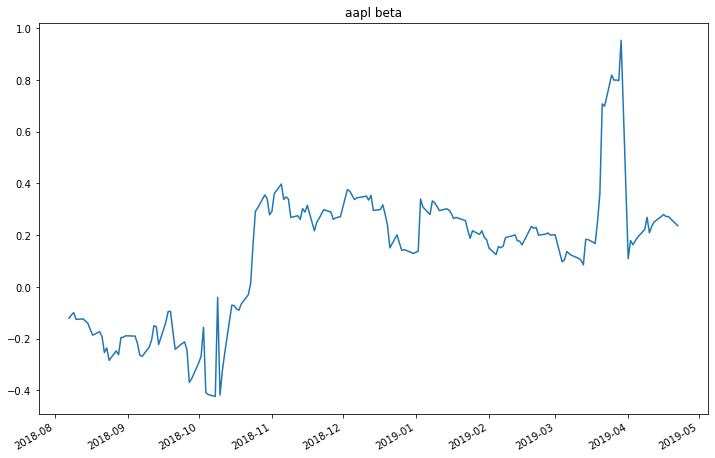

In [240]:
beta.plot(figsize=(12,8),title="aapl beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [241]:
portfolio

,aapl,goog,cost,weighted_portfolio
Trade DATE,,,,
2018-05-14,-0.002333,0.001766,0.000613,0.000015
2018-05-15,-0.009088,-0.019060,-0.002042,-0.010064
2018-05-16,0.009333,0.002354,0.016523,0.009403
2018-05-17,-0.006324,-0.002940,0.004479,-0.001595
2018-05-18,-0.003637,-0.011339,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.019602,0.007953,0.013329
2019-05-06,-0.015443,0.003366,-0.001594,-0.004557
2019-05-07,-0.026957,-0.012855,-0.016583,-0.018798


In [249]:
# Calculate Annualized Sharpe Ratios
Annual_sharpe_ratios = portfolio.mean()*(252)
Annual_sharpe_ratios

aapl                  0.107292
goog                  0.092154
cost                  0.242912
weighted_portfolio    0.147453
dtype: float64

<AxesSubplot:title={'center':'Annual sharp ratios of portfolio'}>

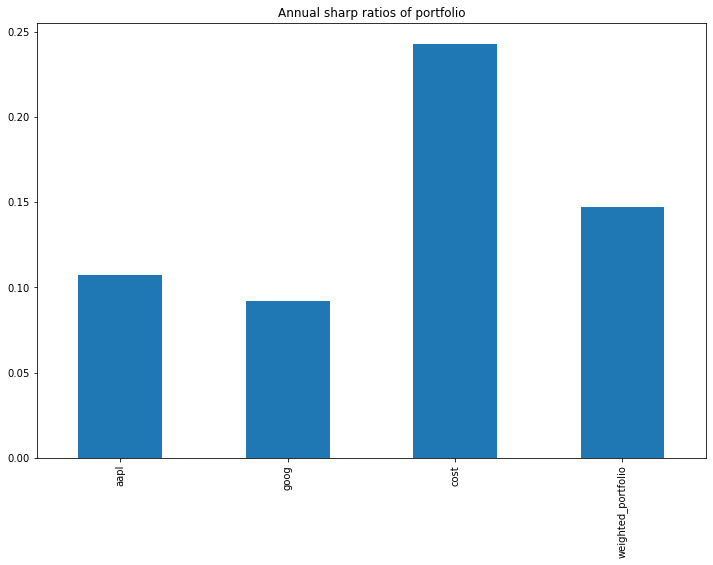

In [250]:
# Visualize the sharpe ratios as a bar plot
Annual_sharpe_ratios.plot(kind = "bar", figsize=(12,8),title="Annual sharp ratios of portfolio")

In [ ]:
'''
This plot shows portfolio is all positive 
sharpe rations basically is how much risk to take to get some returns on portfolio
'''
'''

### How does your portfolio do?

Write your answer here!

In [ ]:
'''
A bar plot shows all stocks are positive, that means while apply the weight helped to give us a positive return

'''